In [1]:
using Plots
# fix fonts
pyplot(tickfont=font("sans-serif"), titlefont=font("sans-serif"), legendfont=font("sans-serif"))
#Plots.scalefontsizes()

Plots.PyPlotBackend()


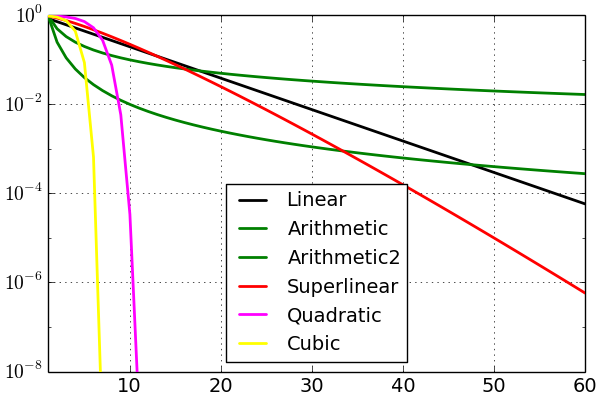

In [2]:
# setup plot data
k = 1:60

# Linear
seq = 0.85.^k
plot(k, seq, lab="Linear", yaxis=:log10, color="black", linewidth=2)

# Arithmetic
plot!(k, 1./k, lab="Arithmetic", yaxis=:log10, color="green", linewidth=2)

seq = 1./(k.^2)
plot!(k, seq, lab="Arithmetic2", yaxis=:log10, color="green", linewidth=2)

# Superlinear
seq = (2*k).^(-0.05*k)
plot!(k, seq, lab="Superlinear", yaxis=:log10, color="red", linewidth=2)

# Quadratic
# overflow for k = 60
t = 1:18
seq = (0.99).^(2.^t)
plot!(t, seq, lab="Quadratic", yaxis=(:log10, (1e-8, 1)), color="magenta", linewidth=2)

# Cubic
t = 1:12
seq = (0.99).^(3.^t)
plot!(t, seq, lab="Cubic", yaxis=(:log10, (1e-8, 1)), color="yellow", linewidth=2)



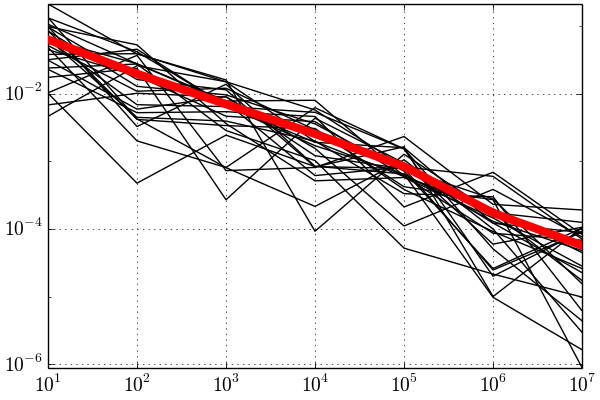

In [3]:

## Examples of convergence
# In this demo we'll see real examples of different types of convergence.

## Monte Carlo arithmetic example
# Let's integrate the function f(x) = x from 0, 1.
# This is really easy to approximate with a Monte Carlo scheme. We just
# take the average of points randomly sampled between 0 and 1.
# This method is known to converge with an arithmetic rate of 1/2.

nt = 25 # do replications to get a good expectation/average
an = zeros(7, 25)
for t = 1:nt
    for i = 1:7
        an[i, t] = mean(rand(10^i, 1)) # use 10^i points!
    end
end
err = abs(an - 1/2)

# Plot the convergence, the slope should be 1/2
plot(10.^(1:7), err, color="black",
xaxis=:log10, yaxis=:log10, legend = false)
plot!(10.^(1:7), mean(err, 2), lab="mean", color="red", linewidth=6,
    xaxis=:log10, yaxis=:log10)



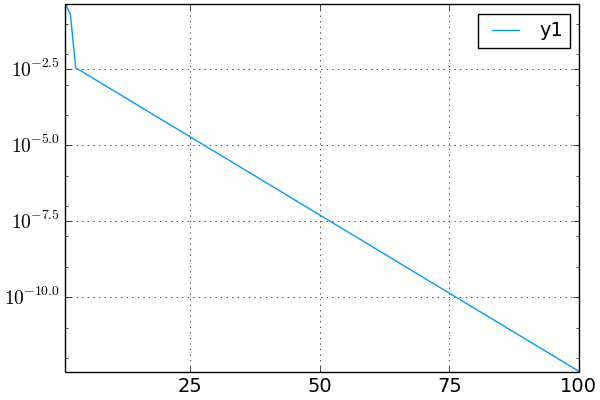

In [4]:

## Steepest descent linear convergence
# The steepest descent method converges linearly. Let's see what happens
# when we use this to minimize the function

# we will minimize the funciton

f = x -> x.^6 - x + 1
x = -1:0.01:1
fx = map(f, x)
using Plots
plot(x, fx, lab="f(x)")

g = x -> 6*x.^5 -1
xtrue = (1/6)^(1/5)

x = 0.0
err = zeros(100)
for i=1:100
    x = x - 0.25*g(x)
    err[i] = abs(x-xtrue)
end
plot(err, yaxis=:log10)